#### Imports

In [1]:
import numpy as np
import os

from spiegelib.ebtimator import ParameterLoss
from matplotlib import pyplot as plt
import seaborn as sns
import spiegelib as spgl

#### All metrics are defined here

In [2]:
def calculateMPE(truePatches, predictedPatches):
    """
    Calculates the mean absolute parameter error
    Args:
        truePatches:
        predictedPatches:

    Returns: a list of mean errors for each parameter and std errors
    """
    errors = []
    for true, predicted in zip(truePatches, predictedPatches):
        patchErrors = []
        for trueParam, predictedParam in zip(true, predicted):
            error = abs(trueParam - predictedParam)
            patchErrors.append(error)
        errors.append(patchErrors)
    errors_mean = np.mean(np.array(errors), axis=0)
    errors_std = np.std(np.array(errors), axis=0)
    return errors_mean, errors_std

Load all data

In [3]:
datasetName = "evaluation_9"

automatableKeys = np.load("../data/presets/op2/automatable_9.npy", allow_pickle=True)
parameterModel = np.load("../data/presets/allParamsUpdatedNew.npy", allow_pickle=True)

#True audio and patches
true_audio = spgl.AudioBuffer.load_folder(f"../data/{datasetName}/audio")
true_patch = np.load(f"../data/{datasetName}/patch/patches.npy", allow_pickle=True)

#Predicted audio and patches
audio_uniform_16 = [spgl.AudioBuffer.load_folder(f"../data/{datasetName}/predict_uniform_16")]
patch_uniform_16 = np.load(f"../data/{datasetName}/predict_uniform_16/params.npy", allow_pickle=True)


C:\Users\hugod\Anaconda3\envs\spiegelib\lib\site-packages\librosa\util\decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


### Plot MPE

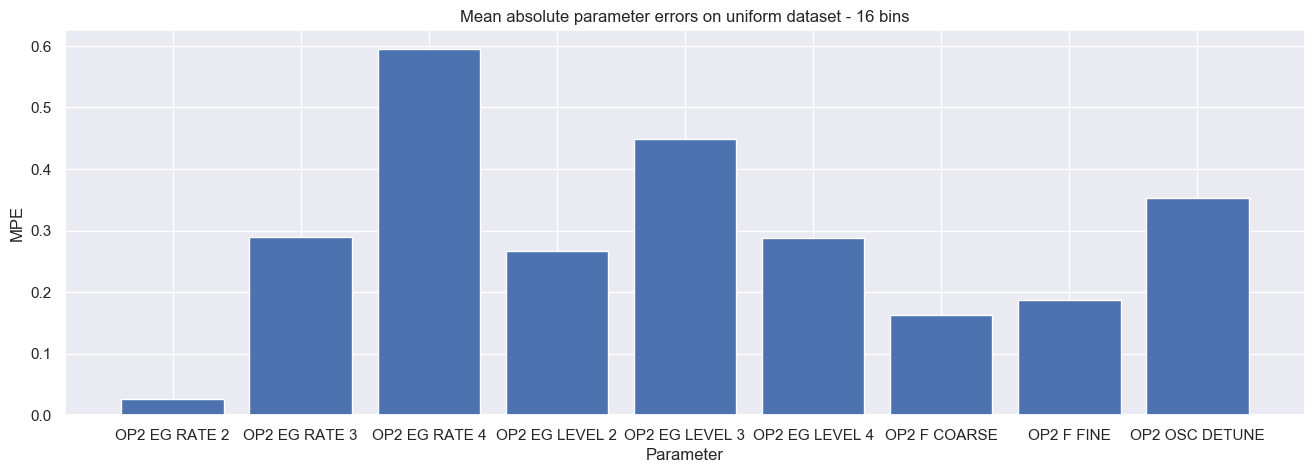

In [19]:
mpe, mpe_std = calculateMPE(true_patch, patch_uniform_16)
x_bar = [x['name'] for x in parameterModel[automatableKeys]]
sns.set_theme()
plt.figure(figsize=(16,5))
plt.bar(x= x_bar, height=mpe)
plt.title("Mean absolute parameter errors on uniform dataset - 16 bins")
plt.xlabel("Parameter")
plt.ylabel("MPE")
plt.savefig("../data/plots/test.png")

#plt.show()

### Plot MFCC

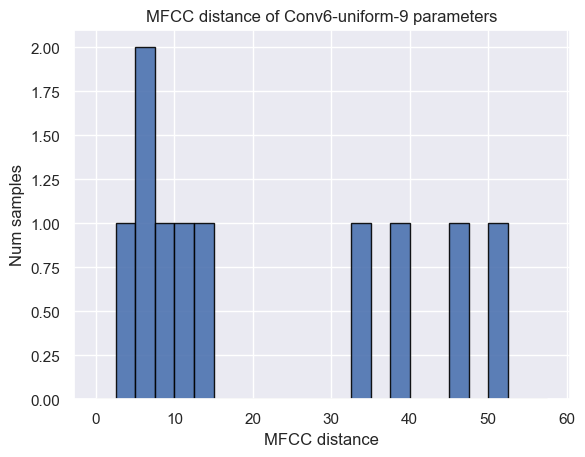

In [20]:
evaluation = spgl.evaluation.MFCCEval(true_audio[:10], audio_uniform_16)
evaluation.evaluate()

bins = np.arange(0, 60, 2.5)
evaluation.plot_hist([0], 'mean_abs_error', bins)

plt.title("MFCC distance of Conv6-uniform-9 parameters")
plt.xlabel("MFCC distance")
plt.ylabel("Num samples")
plt.savefig("../data/plots/test2.png")
#plt.show()